## State

First, define the State of the graph.

The State Schema serves as the input schema for all Nodes and Edges in the graph.

Lets use the TypedDict class from python's typing module as our schema, which providestype hints for the keys.

In [3]:
from typing_extensions import TypedDict
class State(TypedDict):
    graph_state:str

## Nodes

Nodes are just python functions.

The first positional argument is the state, as defined above.

Because the state is a TypedDict with schema as defined above, each node can access the key, graph_state with state['graph_state'].

Each node returns a new value of the state key graph_state.

By defaults, the new value returned by each node will override the prior state value.

In [5]:
def first_node(state):
    print("My First Node is called")
    return {"graph_state": state['graph_state']+" I am playing"}

def second_node(state):
    print("My Second Node is called")
    return {"graph_state":state['graph_state']+" Cricket"}

def third_node(state):
    print("My Third Node is called")
    return{"graph_state":state['graph_state']+ " Badminton"}

## Edges

Edges connect the nodes.
Normal Edges are used if you want to always go from, for example- node_1 to node_2.

Conditional Edges are used if you want to optionally route between nodes.

Conditional edges are implemented as functions that return the next nodes to visit based upon the some logic.

In [6]:
import random
from typing import Literal

def decide_play(state)->Literal['second_node', 'third_node']:
    graph_state=state['graph_state']

    if random.random()<0.5:
        return "second_node"

    return "third_node"



## Graph

#### Graph Construction

Now, we build the graph from our components defined above.

The StateGraph class is the graph class that we can use.

First, we initialize a StateGraph with the State class we defined above.

Then, we add our nodes and edges.

We use the START Node, a special node that sends user input to the graph, to indicatewhere to start our graph.

The END Node is a special node that represents a terminal node.

Finally, we compile our graph to perform a few basics checks on the graph structure.

We can visualize the graph as Mermaid diagram.


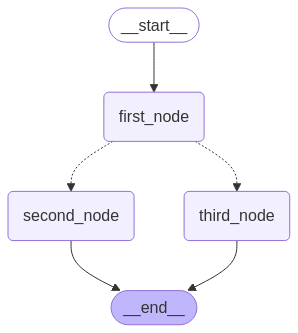

In [7]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

## Build Graph
builder=StateGraph(State)

builder.add_node("first_node",first_node)
builder.add_node("second_node",second_node)
builder.add_node("third_node",third_node)

## Logic
builder.add_edge(START,"first_node")
builder.add_conditional_edges("first_node",decide_play)
builder.add_edge("second_node",END)
builder.add_edge("third_node",END)

## Add
graph=builder.compile()

## View
display(Image(graph.get_graph().draw_mermaid_png()))

## Graph Invocation

The compiled graph implements the runnanble protocol.

This provides a standard way to execute LangChain components.

Invoke is one of the standard methods in this interface.

The input is dictionary{"graph_state":"Hi, this is lance"}, which sets the inital grpah state dict.

When invode is called, the graph starts execution from the START node.

It progresses through the defined nodes(nodes_1, node_2, node_3) in order.

The conditional edge will traverse from node 1 to node 2 or 3 using a 50/50 decision rule.

Each node function receives the current state and returns a new value, which overrides the graph state.

The execution continues untill it reaches the END node.

In [ ]:
# I have changed the username